<a href="https://colab.research.google.com/github/Tstrebe2/predicting-text-difficulty/blob/tim-updates/code/clean-text.eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
repo_path = '/content/drive/MyDrive/milestone-ii/'
train_path = ''.join([repo_path, 'Training_set.csv'])

df_train = pd.read_csv(train_path, sep='\t', index_col='ix')
df_train['lemmatized_text'] = df_train['lemmatized_text'].fillna('')

df_train.head(2)

,original_text,lemmatized_text,d_chall_score,aoa_mean,aoa_min,aoa_max,conc_rating_mean,conc_rating_min,conc_rating_max,num_lemmas,label
ix,,,,,,,,,,,
0,There is manuscript evidence that Austen conti...,there be manuscript evidence that austen conti...,8.236551,5.809310,3.57,12.12,2.495517,1.33,4.57,37.0,1
1,"In a remarkable comparative analysis , Mandaea...",in a remarkable comparative analysis mandaean ...,12.320171,7.499286,2.89,11.94,2.251429,1.46,3.77,21.0,1


In [4]:
num_features = ['d_chall_score',	'aoa_mean',	'aoa_min',	
                'aoa_max',	'conc_rating_mean',	'conc_rating_min',	
                'conc_rating_max',	'num_lemmas']
text_features = 'lemmatized_text'

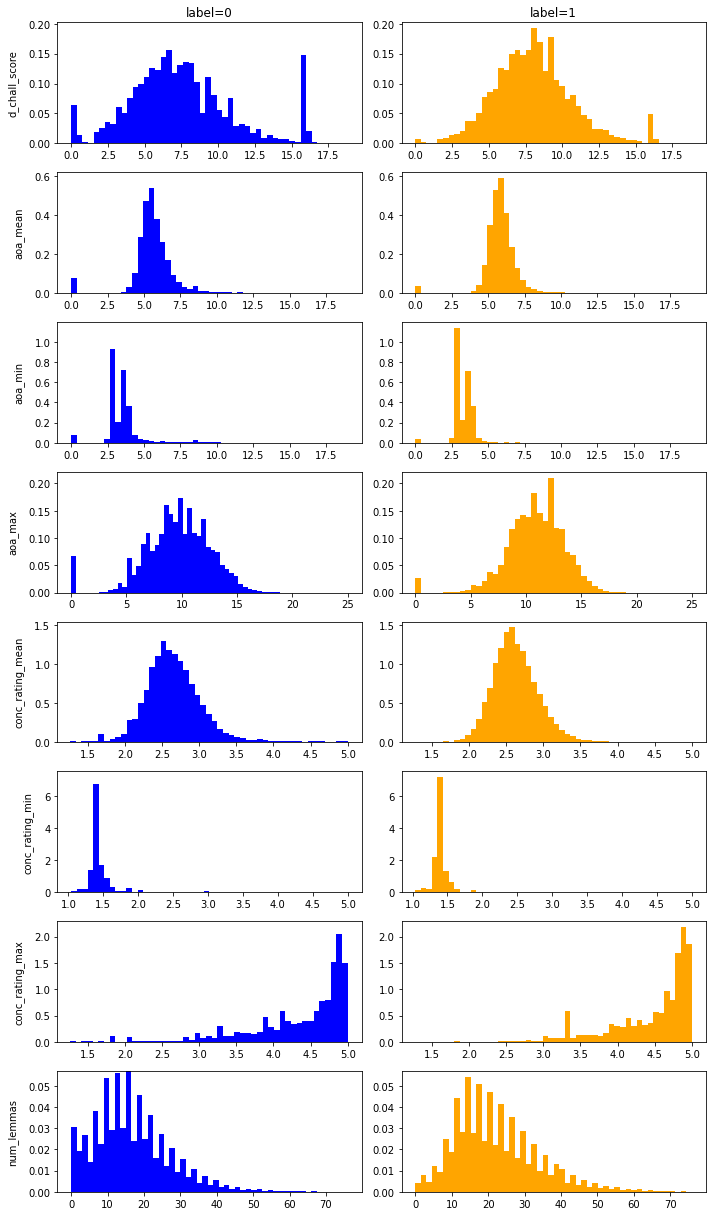

In [5]:
def plot_num_features_histograms():
  fig, axs = plt.subplots(nrows=len(num_features), ncols=2, figsize=(10, 17))

  for ax_pair, feature in zip(axs, num_features):
    for ax, label, color in zip(ax_pair, (0, 1), ('blue', 'orange')):
      ax.hist(
          df_train[df_train['label']==label][feature],
          bins=50,
          color=color,
          density=True,
      )

    axs[0][0].set_title('label=0')
    axs[0][1].set_title('label=1')
    ax_pair[0].set_ylabel(feature, labelpad=10)
    ax_pair[0].set_xlim(ax_pair[1].get_xlim())
    ax_pair[0].set_ylim(ax_pair[1].get_ylim())

  fig.tight_layout()
  fig.show()

plot_num_features_histograms()

In the negative class (0), there is a congregation of d_chall_score values around 15.8, lets investigate this further.

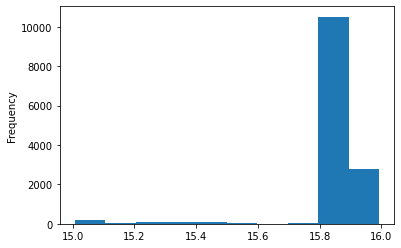

In [ ]:
df_train[(df_train['d_chall_score'] >= 15) &
         (df_train['d_chall_score'] <= 16)]['d_chall_score'].plot.hist()

In [ ]:
df_train[(df_train['d_chall_score'] >= 15.8) &
         (df_train['d_chall_score'] <= 15.85)].head(5)

,original_text,lemmatized_text,d_chall_score,aoa_mean,aoa_min,aoa_max,conc_rating_mean,conc_rating_min,conc_rating_max,num_lemmas,label
ix,,,,,,,,,,,
139,Alternating,alternate,15.8396,8.83,8.83,8.83,NaN,NaN,NaN,1.0,1
140,OMIM =,omim,15.8396,0.00,0.00,0.00,NaN,NaN,NaN,1.0,1
594,Cugy,cugy,15.8396,0.00,0.00,0.00,NaN,NaN,NaN,1.0,1
1187,finance .,finance,15.8396,12.52,12.52,12.52,NaN,NaN,NaN,1.0,1
1467,info .,info,15.8396,9.37,9.37,9.37,NaN,NaN,NaN,1.0,1


It seems as though the d_chall score is consistently 15.8396 for single-tokens that do not contain any lemmas in the d_chall 3000 list.

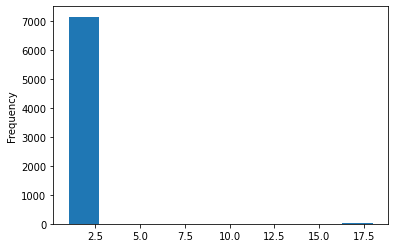

In [ ]:
df_train[(df_train['d_chall_score'] >= 15.8) &
         (df_train['d_chall_score'] <= 15.85)]['num_lemmas'].plot.hist()

It looks like it is. Maybe we should consider removing these from our dataset.

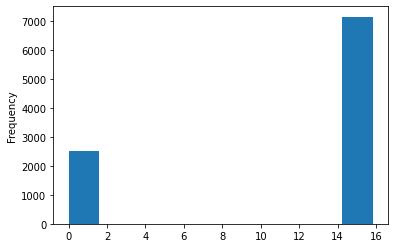

In [ ]:
df_train[(df_train['num_lemmas'] <= 1)]['d_chall_score'].plot.hist()

Lets look at some boxplots now.

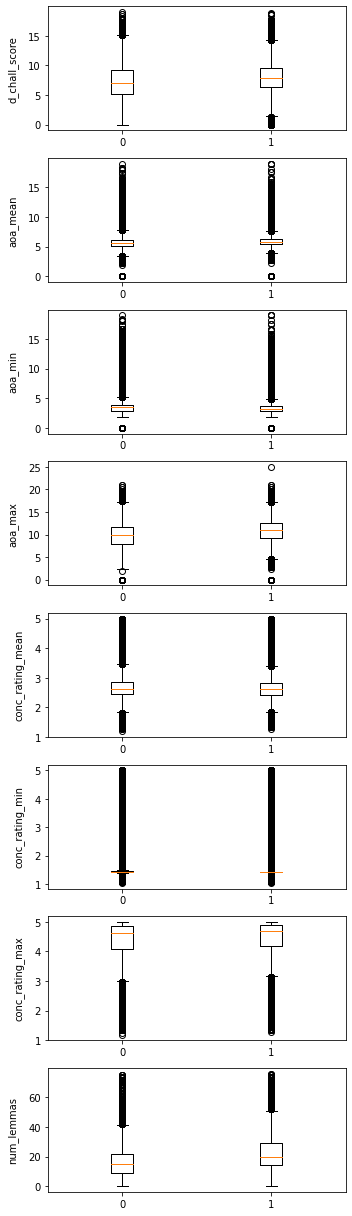

In [10]:
def plot_boxes():
  fig, axs = plt.subplots(nrows=len(num_features), figsize=(5, 17))

  for ax, feature in zip(axs, num_features):
    df_0 = df_train[df_train['label']==0][feature]
    df_1 = df_train[df_train['label']==1][feature]
    ax.boxplot(
        [df_0.fillna(df_0.median()),
         df_1.fillna(df_1.median())],
         labels=(0, 1),
    )
    ax.set_ylabel(feature, labelpad=10)

  fig.tight_layout()
  fig.show()

plot_boxes()